<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Astrostatistics_Lecture19_20231113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

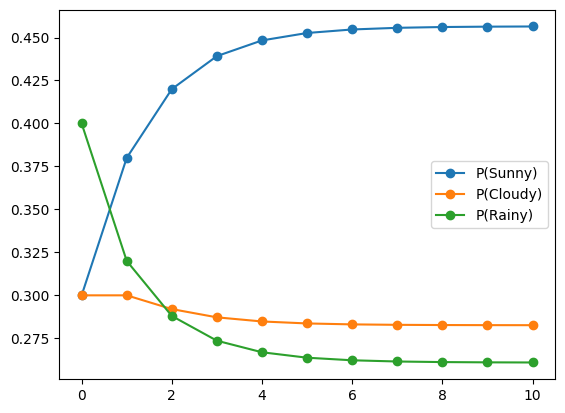

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# P = np.array([[0.7, 0.2, 0.1],
# Define the transition matrix and the initial state probabilities
# T = np.array([[0.6, 0.3, 0.1], [0.2, 0.3, 0.5], [0.4, 0.1, 0.5]])
# P0 = np.array([[0.05], [0.92], [0.03]]).T
T = np.array([[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.2, 0.3, 0.5]])
P0 = np.array([[0.3], [0.3], [0.4]]).T
# P0 = np.array([[0], [0], [1]]).T

PP = [P0]
P = P0
N = 10
for i in range(N):
  P_next = np.matmul(P, T)
  # P_next = np.dot(P, T)
  PP.append(P_next)
  P = P_next.copy()

PP = np.array(PP).squeeze()
limits = PP.min(), PP.max()

plt.plot(PP[:, 0], marker='o', label='P(Sunny)')
plt.plot(PP[:, 1], marker='o', label='P(Cloudy)')
plt.plot(PP[:, 2], marker='o', label='P(Rainy)')
plt.legend(loc='best')

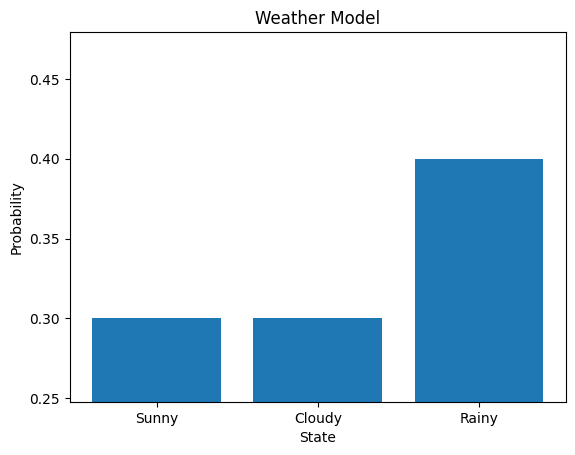

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define a function to update the plot at each iteration
def update(i):
    global limits
    # print(state)
    plt.cla()
    # plt.bar(['Sunny', 'Cloudy', 'Rainy'], state)
    plt.bar(['Sunny', 'Cloudy', 'Rainy'], PP[i, :])
    # plt.ylim([0, 1])
    plt.ylim([0.95 * limits[0], 1.05 * limits[1]])
    plt.title('Weather Model')
    plt.xlabel('State')
    plt.ylabel('Probability')

# Create the animation
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=N, interval=500)

# Display the animation as HTML
HTML(ani.to_jshtml())
